<center><b>Ecole Polytechnique, Cycle Ingénieur (2A)<b></center>
<center>MAP471A - Problem solving en mathématiques appliquées</center>
<center>Enseignants :
    Lucas Gerin <a href="mailto:lucas.gerin@polytechnique.edu">(mail)</a>
    Teddy Pichard	<a href="mailto:teddy.pichard@polytechnique.edu">(mail)</a>
        </center>



# Introduction à l'arrêt optimal

In [ ]:
# # css style
# from IPython.core.display import HTML
# def css_styling():
#     styles = open("./style/custom2.css").read()
#     return HTML(styles)
# css_styling()

In [ ]:
# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing
import random
%matplotlib inline

## Table des matières

- [Arrêt optimal pour le dé](#De)
   - [Simulations](#Simus)
- [Parking optimal](#Parking)

<center>
    <font size=+3 color='red'>!! Cette semaine le TP est à rendre en entier !!</font>
</center>

# Introduction

L'arrêt optimal est le problème que l'on rencontre dans le contexte suivant :
* On dispose de variables aléatoires $X_1,\dots ,X_n,\dots$ dont la loi jointe est connue
* Pour tout $n$ il existe une fonction de gain connue et déterministe $G_n:\mathbb{R}^n\to \mathbb{R}$.
* A chaque $n$, on observe $X_n$ et on doit prendre la décision :
  * d'arrêter et on gagne alors $G_n(X_1,\dots,X_n)$.
  * de continuer.
  
En pratique la plupart des problèmes sont à <b>horizon fini</b> : le processus s'arrête au plus tard pour un certain $N$ (connu d'avance), et alors on est obligé de s'arrêter et de gagner $G_N(X_1,\dots,X_N)$.

### Temps d'arrêt

Dans ce contexte, le <i>temps d'arrêt</i> $\tau$ associé à une stratégie est la variable aléatoire à valeurs dans $\{1,2,\dots\}$ qui donne l'instant où l'on s'arrête. Par hypothèse on a que pour tout l'événement
$$
\{\tau = n\}
$$
est une fonction de $\{X_1,\dots,X_n\}$ (ça ne peut pas dépendre du futur!).

On cherche le temps d'arrêt qui maximise
$$
\mathbb{E}[G_\tau(X_1,\dots,X_\tau)].
$$

<a id="De"></a>
# Arrêt optimal pour le dé


On considère le problème d'arrêt optimal suivant. Soit $N\geq 1$ fixé, vous avez le droit de lancer un dé équilibré jusqu'à $N$ fois de suite. Lorsque vous décidez de vous arrêter vous gagnez la somme indiquée sur le dé et le jeu s'arrête (si vous avez lancé le dé $N$ fois vous gagnez la valeur du dernier tirage).

On a donc un jeu à horizon fini et
<br><br>
$$
G(x_1,\dots,x_n)=x_n.
$$
<br>
et $X_1,X_2,\dots , X_N$ sont les résultats des $N$ dés, qui sont donc des variables iid uniformes sur $\{1,2,\dots , 6\}$.

Le but de cette partie est d'implémenter une stratégie particulière (dont on peut montrer qu'elle est optimale) et d'évaluer son efficacité.

Pour une stratégie fixée et un entier $1\leq n\leq N$ on note  $\mathcal{G}(n,N)\in \{1,2,...,6\}$ la variable aléatoire donnée par le gain d'un joueur qui s'apprête à lancer le $n$-ème dé.
Ce qui nous intéresse est donc  $\mathcal{G}(1,N)$ : le gain du joueur qui commence à jouer.

On pose $g(n,N)=\mathbb{E}[\mathcal{G}(n,N)]$.

On considère la stratégie suivante :
* Si $n=N$ on lance le dernier dé et on gagne  $\mathcal{G}(N,N)=X_N$, et $g(n,N)=\mathbb{E}[X_N]=\frac{7}{2}$.
* Sinon
   * si c'est avantageux : $X_n >  g(n+1,N)$ on s'arrête ;
   * si $X_n \leq  g(n+1,N)$ on continue.

On a donc par construction
$$
\mathcal{G}(n,N)= X_n\mathbf{1}_{X_n>g(n+1,N)}+\mathcal{G}(n+1,N)\mathbf{1}_{X_n\leq g(n+1,N)} \qquad (\star)
%\max (X_n,g(n+1,N)).
$$

<div markdown=1 class="Rmk">
Cette stratégie est en fait l'application à notre problème particulier de la stratégie appelée <a href="https://fr.wikipedia.org/wiki/Enveloppe_de_Snell">Enveloppe de Snell</a>. On peut effectivement montrer que c'est la stratégie qui maximise l'espérance.

<div markdown=1 class="DoIt">

1. Ecrire une fonction `EsperanceMaxDe(v)` qui prend en entrée un réel $v\in [0,6]$ et renvoie
$$
\mathbb{E}[\max (X_1,v)].
$$
$$
\mathbb{E}[\max (X_1,v)] = v.
$$
(Pour vérifier votre code : vous devez trouver `EsperanceMaxDe(1)=3.5` et `EsperanceMaxDe(4)=4.5`.)
2. En passant à l'espérance dans l'équation $(\star)$, trouver une relation de récurrence entre $g(n,N)$ et $g(n+1,N)$. En utilisant `EsperanceMaxDe()`, coder une fonction `GainOptimal(n,N)` qui calcule $g(n,N)$.<br>
(Pour vérifier votre code : pour tout $N$ on doit trouver $g(N-1,N)=4,25$.)

<div markdown=1 class="Answers">

1.
2.

In [ ]:

def EsperanceMaxDe(valeur):
    # Renvoie l'espérance du max entre un dé uniforme et "valeur"

    if valeur == 6:
        return 6

    val_ent = int(valeur)
    return val_ent * valeur / 6 + 1 / 6 * ((val_ent+7) * (6-val_ent) / 2)

EsperanceMaxDe(4)


4.5

In [ ]:

def GainOptimal(n,N):
    if n == N:
        return 3.5

    g_next = GainOptimal(n+1,N)
    return EsperanceMaxDe(g_next)

N = 10
GainOptimal(N-1, N)

4.25

On souhaite comparer numériquement l'algorithme optimal avec 2 benchmark :

**Algorithme Naïf :**
* Si $X_n=6$ on s'arrête, sinon on relance le dé.

**Oracle :**
* On suppose que l'on connaît à l'avance les résultats $X_1,\dots,X_N$. On s'arrête quand on tombe sur $\max_{1\leq n\leq N} X_n$.



<div markdown=1 class="DoIt">

1. Pour l'algorithme naïf et l'oracle, déterminer le gain moyen.<br>
<i>Indication : pour l'oracle, on rappelle que si $M$ est une variable aléatoire entière positive alors</i>
$$
\mathbb{E}[M]=\sum_{k\geq 1}\mathbb{P}(M\geq k)=\sum_{k\geq 1}\bigg(1-\mathbb{P}(M\leq k-1) \bigg).
$$
2. Tracer sur le même graphique les gains pour l'algorithme optimal, l'algorithme naïf et l'oracle pour $n=1,...,N$ avec $N=20$.

<div markdown=1 class="Answers">

1.

In [ ]:
def naive_gain(N):
    return 6 * (1 - (5/6) ** N) + 15 / 5 * (5/6) ** N

N=2
print(naive_gain(N))

def oracle_gain(N):
    return sum([1 - ((k-1) / 6) ** N for k in range(1, 7)])

print(oracle_gain(N))

3.916666666666666
4.472222222222222


Text(0.5, 1.0, 'Différents gains moyens pour N=20')

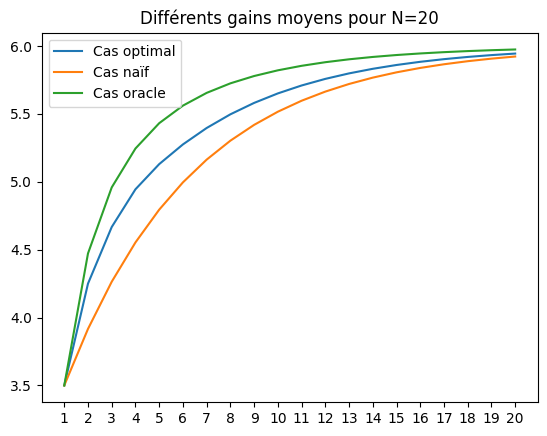

In [ ]:
N = 20
ns = np.arange(1, N+1)

g_opt = np.array([GainOptimal(1, n) for n in ns])
g_naive = naive_gain(ns)
g_oracle = oracle_gain(ns)

plt.plot(ns, g_opt, label="Cas optimal")
plt.plot(ns, g_naive, label="Cas naïf")
plt.plot(ns, g_oracle, label="Cas oracle")

plt.xticks(ns)
plt.legend()
plt.title(f"Différents gains moyens pour N={N}")

<div markdown=1 class="DoIt">
On considère à nouveau l'algorithme optimal. Tracer pour $N$ fixé la courbe qui donne pour chaque $n\leq N$ le résultat au-dessus duquel il faut arrêter de lancer le dé.

Text(0.5, 1.0, 'Resultat à partir duquel il faut arreter de lancer le dé pour N=20')

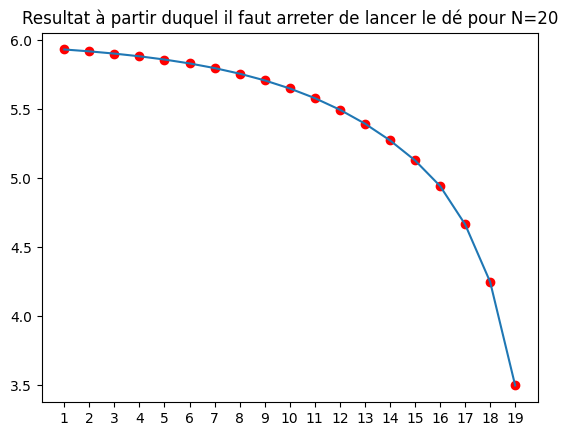

In [ ]:
N = 20
ns = np.arange(1, N)
stop_res = [GainOptimal(n+1, N) for n in ns]
plt.scatter(ns, stop_res, c='r')
plt.plot(ns, stop_res)
plt.xticks(ns)
plt.title(f"Resultat à partir duquel il faut arreter de lancer le dé pour N={N}")

<a id="Simus"></a>

## Simulations

On souhaite maintenant utiliser des simulations pour afficher des réalisations de la variable aléatoire $\mathcal{G}(0,N)$.

<div markdown=1 class="DoIt">

1. Modifier le code précédent pour simuler des réalisations de la variable aléatoire $\mathcal{G}(0,N)$.
2. Afficher le résultat de $1000$ simulations de $\mathcal{G}(0,8)$ dans un histogramme.

<div markdown=1 class="Answers">



Text(0.5, 1.0, 'Histogramme de 1000 simulations de G(0,8)')

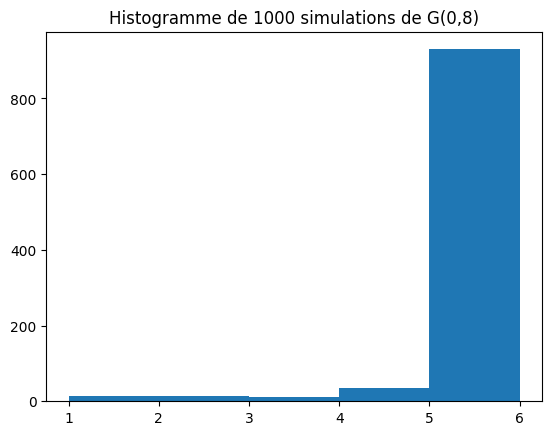

In [ ]:
def rand_opt_gain(n, N):
    "Simule le gain aléatoire dans le cas de la stratégie optimale"
    X = np.random.choice(np.arange(1, 7))
    if n == N:
        return X

    if X > GainOptimal(n+1, N):
        return X

    return rand_opt_gain(n+1, N)

M = 1000
N = 8
rand_opt_wins = np.array([rand_opt_gain(0, N) for _ in np.arange(1, M+1)])
plt.hist(rand_opt_wins, bins=np.arange(1, 7))
plt.title(f"Histogramme de {M} simulations de G(0,8)")

<a id="Parking"></a>
# Parking optimal

On s'intéresse à un autre problème d'arrêt optimal : le problème du parking sur $\mathbb{N}_*$.

On suppose que les places $\{1,2,3,...\}$ sont occupées indépendamment avec probabilité $p$ par des voitures. Notre objectif est de se garer le plus proche possible de $K$ (un entier fixé et connu) de sorte que le coût pour se garer à la place $i$ est
$$
F(|i-K|),
$$
où $F$ est une fonction croissante positive.

Le problème est que l'on ne peut observer les places occupées que une à une.
On cherche donc le temps d'arrêt $\tau$ qui minimise
$$
\mathbb{E}[F(|\tau-K|)].
$$
Pour une stratégie fixée et une position $1\leq i $ on note
$$
\mathcal{P}(i,K)
$$
la variable aléatoire donnée par la position à laquelle je vais me garer juste avant d'observer si $i$ est libre ou pas. On note $G(i,K)$ le coût que je vais subir :
\begin{align*}
G(i,K)&=F(|\mathcal{P}(i,K)-K|),\\
g(i,K)&=\mathbb{E}\left[G(i,K)\right].
\end{align*}

On considère la stratégie suivante :
* Si $i\geq K$ on se gare dès que possible
* Si $i< K$ on se gare en $i$ si
   * la place est vide
   * <b>ET</b> c'est avantageux : $F(|i-K|) \leq g(i+1,K)$.



<div markdown=1 class="DoIt">

1. Pour la stratégie ci-dessus, déterminer $\mathbb{P}(\mathcal{P}(i,K)=j)$ dans le cas $i\geq K$. En déduire $g(K,K)$.
2. Pour $i\geq 1$ on note $Z_i=0$ (resp. $Z_i=1$) si la place $i$ est libre (resp.occupée). Pour $i<K$ écrire une relation de récurrence entre $G(i,K), G(i+1,K), Z_i$ et $g(i+1,K)$.

<div markdown=1 class="Answers">
1.
2.

<div markdown=1 class="DoIt">

1. Ecrire une fonction qui calcule $c(i,K,p)$. (On prendra $F(x)=|x|$.)
2. Pour $K=20$ tracer une courbe qui permette de déterminer à partir de quand doit-on se garer à la première place disponible.

In [ ]:
F = lambda x: abs(x)

def g(K, p, F, max_iter=1000, tol=1e-7):
    "Evalue g(K, K)"

    fact = 1
    sum = fact * F(0)

    for i in range(1, max_iter):
        fact *= p
        term = F(i) * fact
        # print(fact, term, sum)
        if term < tol:
            break

        sum += term

    return sum * (1-p)

g(20, 0.4, F)

0.6666665713756592

In [ ]:
def c(i, K, p, F):
    "Evalue le gain moyen "
    if i == K:
        return g(K, p, F)

    c_next = c(i+1, K, p, F)
    F_i = F(K-i)

    # print(c_next, F_i, c_next * p + F_i * (1-p))
    if c_next < F_i:
        return c_next

    return c_next * p + F_i * (1-p)

c(9, 10, 0.3, F)

0.42857135785181555

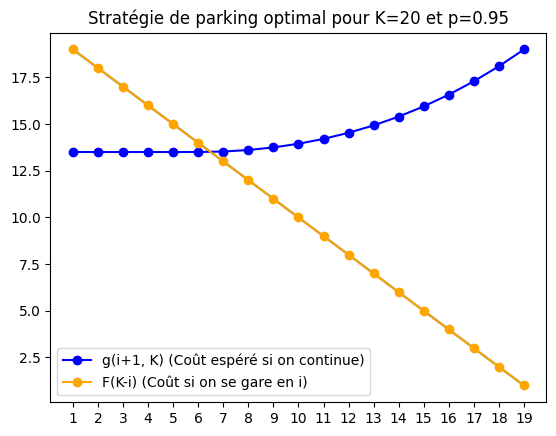

In [ ]:
# Courbe de détermination du moment où l'on doit se garerà la première place disponible
K = 20
p = 0.95
ns = np.arange(1, K)
c_nexts = np.array([c(k+1, K, p, F) for k in ns])
cs = np.array([F(K-i) for i in ns])
plt.plot(ns, cs)

plt.plot(ns, c_nexts, 'bo-', label='g(i+1, K) (Coût espéré si on continue)')
plt.plot(ns, cs, 'o-', color='orange', label='F(K-i) (Coût si on se gare en i)')
plt.title(f"Stratégie de parking optimal pour K={K} et p={p}")
plt.xticks(ns)
plt.legend()